# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular and proliferous datasets used for machine learning students. It can be read about here: https://en.wikipedia.org/wiki/Iris_flower_data_set

There are four features: sepal length, sepal width petal length, and petal width

***

In this exercise, I will use k-means clustering to cluster the dataset based on the four features above. I will utilize the Elbow Method to assist in determining the optimal number of clusters, and compare my answer back to the full dataset containing the Iris species.

---

## Outline

  1. Import Libraries and Load Data
  2. Explore Data
  3. Clustering, Scaling, and The Elbow Method
  4. Determine Number of Clusters
  5. Compare to Original Iris Dataset
  
---

# 1. Import Libraries and Load Data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.cluster import KMeans

## Load the Data
Load the data from the csv file: *'iris-dataset.csv'*

In [2]:
#Loading
data = pd.read_csv('iris-dataset.csv')

#check the data
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 2. Explore the Data

## Plot the Data
We'll start by visualizing the data by the shape of their sepal

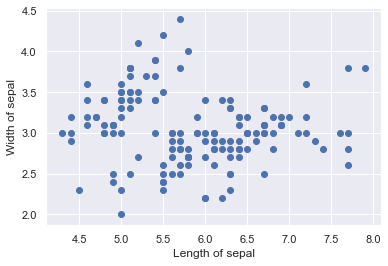

4.3245512

In [3]:
#Create a scatter plot based on sepal_length and sepal_width
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
timeit.timeit(plt.show)

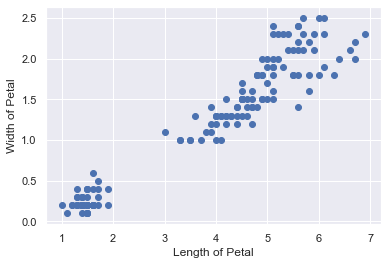

4.3660199

In [4]:
#Create a scatter plot based on petal length and petal width
plt.scatter(data['petal_length'],data['petal_width'])
plt.xlabel('Length of Petal')
plt.ylabel('Width of Petal')
timeit.timeit(plt.show)

# 3. Clustering, Scaling, and the Elbow Method

## Clustering (unscaled data)
Seperate the original data into two clusters.

In [5]:
#Create a variable to contain the data for clustering
x = data.copy()

#Create a k-means object with 2 clusters
kmeans = KMeans(2)

#fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#Create a copy of 'data' to see the clusters next to the original data
clusters = data.copy()

#predict the clusters for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

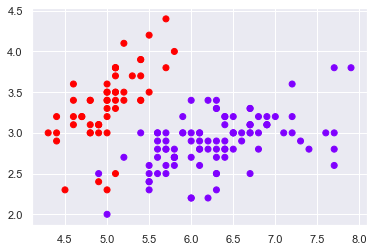

In [7]:
#create a scatter plot based on the two corresponding features
plt.scatter(clusters['sepal_length'], clusters['sepal_width'],
           c= clusters['cluster_pred'],
           cmap = 'rainbow')

## Standardize the variables
Import and use the *scale* function form sklearn.

In [8]:
#import the preprocessing module
from sklearn import preprocessing

#scale the data for better results
x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Clustering Scaled Data

In [9]:
#create a k-means object with two clusters
kmeans_scaled = KMeans(2)

#fit the data
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
#create a copy of the data to see the cluster next to the original data
clusters_scaled = data.copy()

#predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

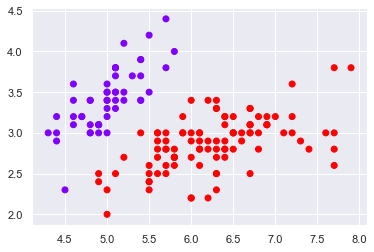

In [11]:
#create a scatter plot of the scaled data
plt.scatter(clusters_scaled['sepal_length'],
           clusters_scaled['sepal_width'],
           c= clusters_scaled['cluster_pred'],
           cmap = 'rainbow')

#### Observation
The clusters for the scaled versus non-scaled data are pretty similar, but there is a more obvious split between the two clusters with the scaled data.

## The Elbow Method

### Within-Cluster Sum of Squares (WCSS)

In [12]:
wcss = []
#'cl_num' is a variable that keeps track of the maximum number of clusters we want
cl_num = 10
for i in range (1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676345,
 140.96837895511078,
 114.61550694959809,
 91.19197002146466,
 82.04206891094623,
 71.30070564118623,
 64.20651248964961,
 55.39943159226493]

### Plot the Elbow from WCSS

Text(0, 0.5, 'Within-Cluster Sum of Squares')

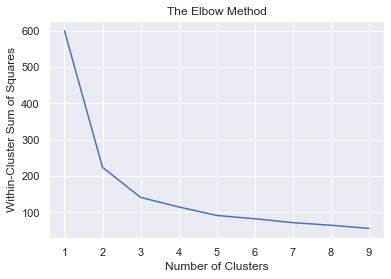

In [13]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

Based on the curve, there are several options for the appropriate amount of clusters (K) betweeen 2 and 5.  Based on this, I'll seperate the data into clusters for each K, plot the results and assess the appropriate number of clusters to apply to my data. K=2 has already been done above.

## 4. Determine the Number of Clusters

### 3 Clusters
For each, we'll use the standardized data

In [14]:
#First seperate standarized data into 3 clusters
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

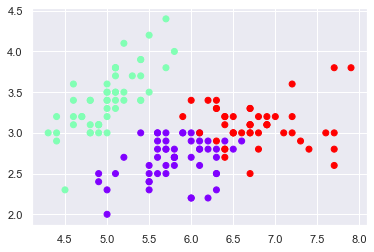

In [15]:
#Plot the non-standardized values of sepal length and width
#make a copy of the non-standarized dataframe and join in the predictions
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

#construct the plot
plt.scatter(clusters_3['sepal_length'],
           clusters_3['sepal_width'],
           c = clusters_3['cluster_pred'],
           cmap = 'rainbow')

### 4 Clusters

In [16]:
kmeans_4 = KMeans(4)
kmeans_4.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

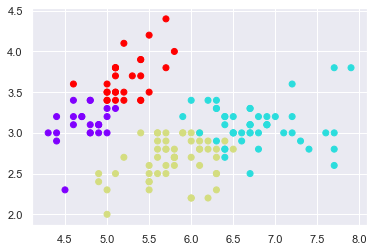

In [17]:
clusters_4 = x.copy()
clusters_4['cluster_pred']=kmeans_4.fit_predict(x_scaled)

plt.scatter(clusters_4['sepal_length'],
           clusters_4['sepal_width'],
           c = clusters_4['cluster_pred'],
           cmap = 'rainbow')

### 5 Clusters

In [18]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

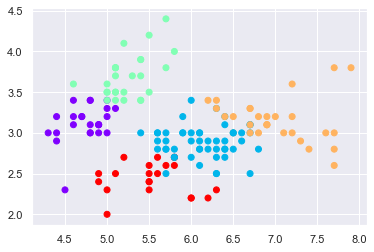

In [19]:
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)

plt.scatter(clusters_5['sepal_length'],
           clusters_5['sepal_width'],
           c = clusters_5['cluster_pred'],
           cmap = 'rainbow')

#### Solution
Based on the plots, **K=2 seems to be the best solution.** Three, four, and five clusters appear to have too many similarities (not much distance) between clusters.

## 5. Compare solution to the origianl dataset
The original, full dataset contains a variable called species that was excluded for this practice. I'll now load that data set in and compare back to my kmeans analysis.

In [20]:
full_data = pd.read_csv('iris-with-answers.csv')

In [21]:
full_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
#Use the map function to assign values to the species
full_data['species'] = full_data['species'].map({'setosa':1, 'versicolor':2, 'virginica':3})

pd.options.display.max_rows = 500
full_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


### Scatter plots for comparison of full vs. predicted

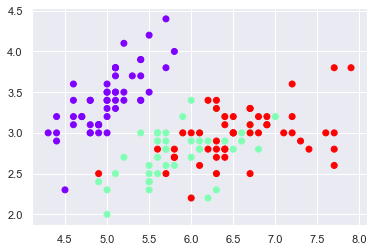

In [23]:
plt.scatter(full_data['sepal_length'],
           full_data['sepal_width'],
           c = full_data['species'],
           cmap = 'rainbow')

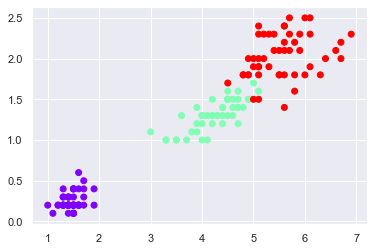

In [24]:
plt.scatter(full_data['petal_length'],
           full_data['petal_width'],
           c = full_data['species'],
           cmap = 'rainbow')

Based on the full dataset scatter plots, let's look at our predicted clusters specifically at the petal variables instead of sepal.

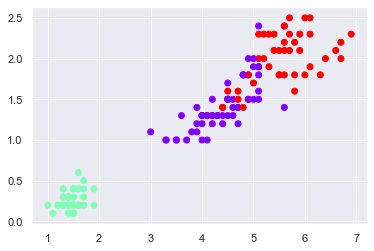

In [25]:
plt.scatter(clusters_3['petal_length'],
           clusters_3['petal_width'],
           c=clusters_3['cluster_pred'],
           cmap='rainbow')

### Outcome
Looks like the algorithm we build was more sensitive to sepal variation then petal variation. However, species determination seems to have more releveanc based on petal than sepal.

Overall, the algorithm doesn't perform well for this dataset in that biology may not always be quantified with k-means. Other methods would be better.